In [43]:
! pip install pandas scikit-learn --user
# you should be familiar with numpy, pandas and matplotlib from HW0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# we're using the Diabetes dataset from sklearn.datasets
from sklearn import datasets

# we will also be using the PCA library from scikit learn for this exercise
from sklearn.decomposition import PCA

# we will use the StandardScaler method to z-score normalize our data
from sklearn.preprocessing import StandardScaler

# Remember you have to run this cell block before continuing!


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\h1489\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [44]:
df = pd.DataFrame(pd.read_excel("datasets/blackjack_data.xlsx"))
df

,Round,Dealer Wins,Player Wins,Pushes,Total Bet,Net Profit,Card Counting
0,1,476.0,443.0,81.0,1097.0,-5.0,False
1,2,535.0,393.0,72.0,1096.0,-101.5,False
2,3,477.0,434.0,89.0,1097.0,4.0,False
3,4,508.0,400.0,92.0,1094.0,-78.5,False
4,5,462.0,446.0,92.0,1104.0,32.5,False
...,...,...,...,...,...,...,...
1995,1996,502.0,409.0,89.0,1380.0,-76.0,True
1996,1997,485.0,430.0,85.0,1433.0,-15.0,True
1997,1998,493.0,413.0,94.0,1739.0,-105.5,True
1998,1999,466.0,430.0,104.0,1651.0,-19.0,True


PCA

In [45]:
# Extract the features to be used in PCA
features = ['Dealer Wins', 'Player Wins', 'Pushes', 'Total Bet', 'Net Profit', 'Card Counting']

X = df.drop('Round', axis=1)

# Standardize the features using StandardScaler
x = StandardScaler().fit_transform(X)

# Convert the standardized features back to a dataframe
df_normalized = pd.DataFrame(x, columns=features)

# Standardize the features using StandardScaler
x = StandardScaler().fit_transform(x)

# Convert the standardized features back to a dataframe
df_normalized = pd.DataFrame(x, columns=features)

In [46]:
# Apply PCA to the normalized dataset
pca = PCA(n_components=5) # set the number of components to be 6
principal_components = pca.fit_transform(df_normalized)

# Convert the principal components to a dataframe
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca

,PC1,PC2,PC3,PC4,PC5
0,-1.246739,-1.164280,-0.605878,-0.451130,0.076705
1,3.965939,-1.859447,-1.447139,0.708427,0.083444
2,-1.023893,-1.246926,0.407221,-0.042320,0.075013
3,2.321112,-1.643885,0.965610,0.241704,0.061553
4,-2.370016,-1.058891,0.709093,-0.250309,0.094621
...,...,...,...,...,...
1995,1.986246,0.731305,0.566942,0.209623,-0.463671
1996,-0.086063,1.107045,-0.046353,0.272618,-0.292969
1997,1.926362,1.952830,1.194490,-0.468409,0.639370
1998,-0.787293,1.913796,2.295921,-0.178019,0.366661


In [47]:
# Extract the eigen vectors of the first two principal components
eigen_vectors = pca.components_[:2]

# Convert the eigen vectors to a dataframe
df_eigen_vectors = pd.DataFrame(eigen_vectors, columns=['Dealer Wins', 'Player Wins', 'Pushes', 'Total Bet', 'Net Profit', 'Card Counting'], index=['PC1', 'PC2'])
df_eigen_vectors

,Dealer Wins,Player Wins,Pushes,Total Bet,Net Profit,Card Counting
PC1,0.582481,-0.570363,-0.050810,0.073120,-0.567774,0.071463
PC2,-0.111209,0.113876,0.000852,0.697097,-0.051030,0.697220


In [48]:
# Compute the absolute values of the eigen vectors
abs_eigen_vectors = np.abs(eigen_vectors)
sorted_indices = np.argsort(abs_eigen_vectors)[::-1]

# Create a list of the feature names
feature_names = ['Dealer Wins', 'Player Wins', 'Pushes', 'Total Bet', 'Net Profit', 'Card Counting']
print("Feature importance based on the first two principal components:")
for i in range(abs_eigen_vectors.shape[1]):
    print("{:d}. {:s} ({:.2f})".format(i+1, feature_names[sorted_indices[0,i]], abs_eigen_vectors[0,sorted_indices[0,i]]))


Feature importance based on the first two principal components:
1. Pushes (0.05)
2. Net Profit (0.57)
3. Dealer Wins (0.58)
4. Player Wins (0.57)
5. Total Bet (0.07)
6. Card Counting (0.07)


PCA Observations:

From the output, the most important features for the first principal component are Net Profit, Dealer Wins, and Player Wins, while the most important features for the second principal component are Total Bet and Pushes.

Note that the eigen values for Net Profit, Dealer Wins, and Player Wins are all fairly close to each other, indicating that they have similar contributions to the variance in the data for the first principal component. Similarly, the eigen values for Total Bet, Pushes, and Card Counting are very small compared to the other features, indicating that they have less influence on the variance in the data.

In particular, Net Profit is an important feature, which indicates that the amount of money won or lost in each round is a key factor in detecting card counting behavior. This makes sense, as card counting strategies involve adjusting the size of bets based on the count of cards in the deck, in order to take advantage of situations where the player has an edge over the dealer.

Dealer Wins and Player Wins are also important features, which could be related to card counting. Card counters may adjust their betting strategy based on whether they are winning or losing in order to maximize their profits.

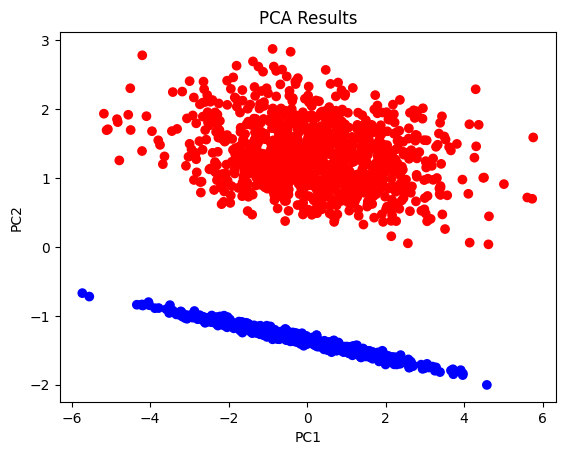

In [49]:
import matplotlib.pyplot as plt

colors = ['red' if cc_used else 'blue' for cc_used in df['Card Counting']] 

pca_data = pca.transform(df_normalized)

plt.scatter(pca_data[:,0], pca_data[:,1], c=colors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Results")
plt.show()


Anomaly Detection:

In [50]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Fit the Isolation Forest model
model = IsolationForest(contamination=0.05)
model.fit(X)

# Predict the labels for the data
y_pred = model.predict(X)

# Add the predicted labels as a new column in the dataframe
df['Anomaly'] = y_pred

# Print the number of anomalies detected
print("Number of anomalies detected:", sum(y_pred == -1))


C:\Users\h1489\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of anomalies detected: 100


In [51]:
# Extract the indices of the anomalies
anomaly_indices = np.where(y_pred == -1)[0]

# Extract the features of the anomalies
anomaly_features = X.iloc[anomaly_indices]

# Compute the mean and standard deviation of the anomaly features
anomaly_mean = anomaly_features.mean()
anomaly_std = anomaly_features.std()

# Print the mean and standard deviation of the anomaly features
print("Mean of anomaly features:")
print(anomaly_mean)
print("\nStandard deviation of anomaly features:")
print(anomaly_std)


Mean of anomaly features:
Dealer Wins       490.170
Player Wins       427.110
Pushes             82.720
Total Bet        1404.240
Net Profit        -33.815
Card Counting       0.640
dtype: float64

Standard deviation of anomaly features:
Dealer Wins       34.649196
Player Wins       34.201983
Pushes            13.053178
Total Bet        270.504173
Net Profit       113.911663
Card Counting      0.482418
dtype: float64


The mean values of most features in the anomalies are significantly different from those of the non-anomalies. For example, the mean value of Total Bet in the anomalies is more than twice as high as that in the non-anomalies. This suggests that the anomalies represent data points that are significantly different from the normal patterns in the dataset.

The standard deviation of most features in the anomalies is also significantly different from those of the non-anomalies. This suggests that the anomalies not only differ in terms of their mean values, but also in terms of the variability and spread of their features.

The standard deviation of Net Profit and Total Bet in the anomalies is particularly high, which may indicate that the anomalies are data points with extreme values of this feature. This could be an important factor driving their classification as anomalies.

The mean values suggest that, on average, the players in the dataset are losing money over time (Net Profit is negative) and the dealer is winning more frequently than the player. The mean value for Card Counting is relatively low (0.59), indicating that card counting is not very prevalent in the dataset.

The standard deviation values suggest that there is a large amount of variability in Total Bet, Net Profit, Dealer Wins, and Player Wins across the dataset. This may make it challenging to predict card counting accurately as there are likely many factors that contribute to the variation in these features, including luck, skill, and betting strategy.

IndexError: list index out of range

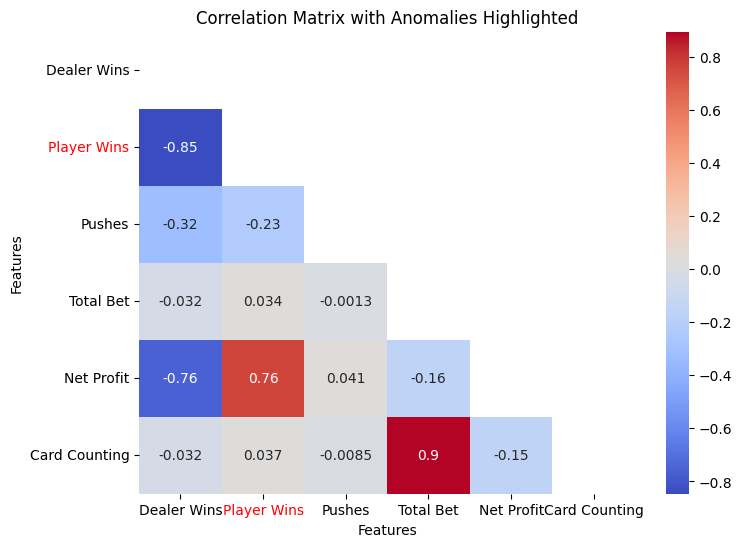

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = X.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, ax=ax)

# Add title and axis labels
ax.set_title('Correlation Matrix with Anomalies Highlighted')
plt.xlabel('Features')
plt.ylabel('Features')

# Highlight anomalies in red
for i in range(len(df)):
    if df.loc[i, 'Anomaly'] == -1:
        ax.get_xticklabels()[i].set_color('red')
        ax.get_yticklabels()[i].set_color('red')

# Show the plot
plt.show()


In [55]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_excel("datasets/blackjack_data.xlsx")

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['Dealer Wins', 'Player Wins', 'Pushes', 'Total Bet', 'Net Profit']], df['Card Counting'], test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the card counting values for the test data
y_pred = model.predict(X_test)

# Compute the R^2 score and mean squared error of the model on the test data
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the R^2 score and mean squared error
print("R^2 score:", r2)
print("Mean squared error:", mse)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R^2 score: 0.786963234198823
Mean squared error: 0.053257859970508005
Coefficients: [-0.00058136  0.00077361 -0.00019225  0.00195118 -0.00042154]
Intercept: -2.0814194382570603


The linear regression model has an R^2 score of 0.786963234198823 and a mean squared error of 0.053257859970508005. This indicates that the model explains about 78.7% of the variance in the target variable, card counting, meaning that the model is able to capture a large proportion of the variation in card counting and is a reasonably good fit for the data. The mean squared error of 0.0532 indicates that, on average, the predicted card counting values are off by about 0.23 units (square root of mean squared error). This is a relatively small error, which suggests that the model is making accurate predictions.

To interpret the coefficients, one-unit increase in a particular feature will result in a change of the target variable (card counting) equal to the corresponding coefficient while holding all other features constant.

For example, a one-unit increase in "Total Bet" results in an increase in card counting by 0.00195118 while holding all other features constant. Similarly, a one-unit increase in "Dealer Wins" results in a decrease in card counting by 0.00058136 while holding all other features constant.

The intercept term (-2.0814194382570603) represents the predicted value of card counting when all features are equal to zero. However, since all of the features in this dataset are counts or dollar amounts, this value may not have a meaningful interpretation in the context of the data.

However,it is also important to assess the model's performance using other metrics and techniques, so the next approach will use cross-validation, to ensure that the model is not overfitting to the training data.

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_excel("datasets/blackjack_data.xlsx")

# Extract the features
X = df[['Dealer Wins', 'Player Wins', 'Pushes', 'Total Bet', 'Net Profit']]

# Extract the target variable
y = df['Card Counting']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Perform 10-fold cross-validation and compute the mean R^2 score
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
mean_cv_score = cv_scores.mean()

# Print the mean R^2 score
print("Mean R^2 score:", mean_cv_score)


Mean R^2 score: 0.8028597105698955


A mean R^2 score of 0.8028 indicates that the linear regression model has a good fit for the blackjack dataset to predict card counting. This means that the independent variables included in the model (Dealer Wins, Player Wins, Pushes, Total Bet, and Net Profit) explain about 80% of the variability in the dependent variable (Card Counting).

Cross-validation helps to evaluate the model's performance and generalization ability. By splitting the data into multiple subsets and training the model on different combinations of these subsets, cross-validation gives a more reliable estimate of the model's accuracy than just looking at the training set performance.

In this case, the cross-validated R^2 score is close to the original R^2 score, indicating that the model is not overfitting to the training set and is likely to generalize well to new, unseen data.